# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

###Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

###Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal.

### Questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

###Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [ ]:
data = pd.read_csv('Abtest.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

###Data Overview
  
The initial steps to get an overview of any dataset is to perform a sanity check by:

* Observing the first few rows of the dataset, to check whether the dataset has been loaded properly or not
* Getting information about the number of rows and columns in the dataset
* Finding out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
* Checking the statistical summary of the dataset to get an overview of the numerical columns of the data
* Checking for missing values and duplicate

In [ ]:
# The Head() returns the first 5 rows of the dataframe
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


* The dataset contains the user ID of each person visitig the website with their specific group,the kind of landing page visited, time spent on the page, conversion type and language preferred.
* The columns user_id and time_spent_on_the_page are numerical in nature.

In [ ]:
# The shape() is used to get the number of rows and columns of the dataset
df.shape

(100, 6)

* There are **100 rows** and **6 columns** in the dataset which represents information regarding the interaction of users in both treatment and control groups with the two versions of the landing page.

In [ ]:
# The info() is used to print a concise summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* The user_id is an integer data-type and it contain user ID of each person visiting the landing page
* The time_spent_on_the_page is a float data-type
* The group, landing page, converted, and language_preferred are object data-type.
* All the columns have 100 observations, which means none of the columns has null values
* The dataset consumed 4.8+ KB memory usage.

In [ ]:
# checking missing values across each columns
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in the dataset, hence no need of treating them

In [ ]:
# checking duplicate values across each columns
df.duplicated().sum()

0

* There are no duplicate values in the dataset

In [ ]:
# The describe() is used to get the statistical summary of the dataset
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
# In order to make the statistical summary easier to read, the describe() is transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


* From the dataset, on an average, the time spent on the page by a user  is 5.38 minutes per day.
* The median time spent on the page (5.42 minutes) is greater than the average, which suggests that the data is a little skewed to the left.
* The minimum and maximum time spent on the page from the sample data are 0.19 minutes and 10.71 minutes respectively. This shows that the usage time covers a wide range of values.

In [ ]:
df.describe(include = ['object']).T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


* **More than 50% of the users are converted**
* **Variable group, landing page, converted are only two categories**
* **There are three (3) categories of preferred languages which are English, French and Spanish**

### Univariate Analysis

#### Time spent on the page

##### Observation on User ID

In [ ]:
# Number of unique User ID
df.user_id.nunique()

100

* **There are 100 unique User ID**

##### Observation on Time Spent on Stage

In [ ]:
# Number of unique Time Spent on the Page
df.time_spent_on_the_page.nunique()

94

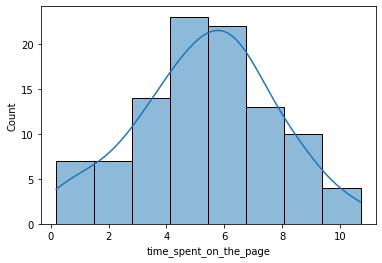

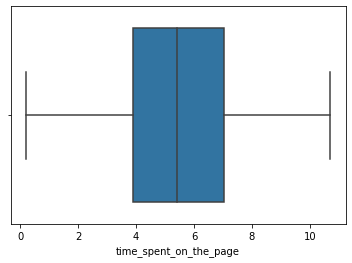

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page', kde= True)
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

* **There are 94 unique time spent on the page**
* **The time spent on the landing page is slightly skewed to the left**
* **The median value is 5.42 mins, minimum value is 0.19 mins and maximum value being 10.71 mins without any outliers** 

##### Observation on Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

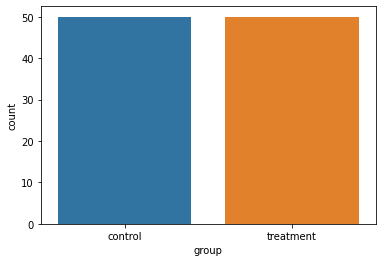

In [ ]:
sns.countplot(data=df,x='group')
plt.show()

* **Both Control and Treatment group have the same number of count**

##### Observation Landing Page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

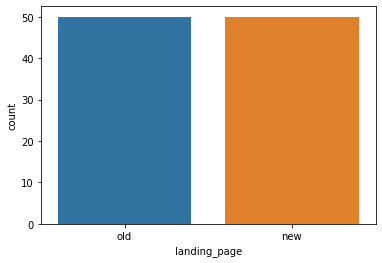

In [ ]:
sns.countplot(data=df,x='landing_page')
plt.show()

* **Both New and Old landing page have the same number of count**

##### Observation on Converted Status

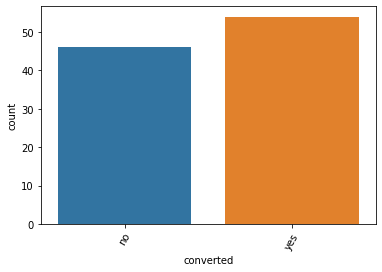

In [ ]:
sns.countplot(data=df,x='converted')
plt.xticks(rotation=60);

* **The converted landing page is higher than none-converted landing page**

##### Observation on Language Preferred

In [ ]:
# Number of unique Language Preferred
df.language_preferred.nunique()

3

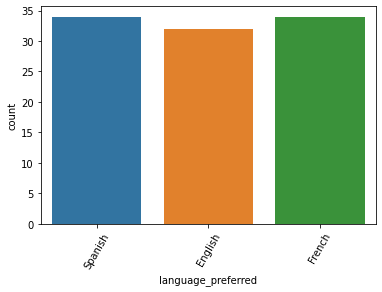

In [ ]:
sns.countplot(data=df,x='language_preferred')
plt.xticks(rotation=60);

* **There are 3 unique language prefrred. Spanish and French are mostly Preferred language by the user while English is the least preferred language among the three languages**

### Bivariate Analysis

##### Time Spent on page vs Landing Page

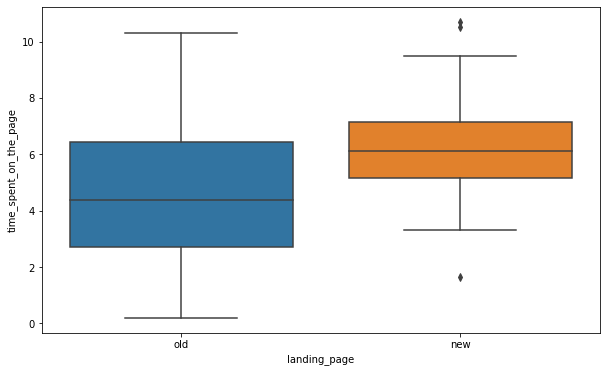

In [ ]:
# Relationship between time spent on the page and landing page
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = "landing_page", y = "time_spent_on_the_page")
plt.show()

* **The median, mininum and maximum time spent on the new landing page is about 6 mins, 3 mins and 9 mins respectively with some outliers.**
* **Users spent more time on the new landing page compared to old landing page**

##### Time Spent on page vs Group Type

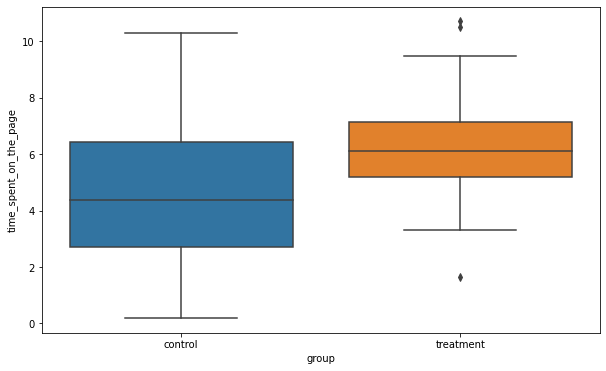

In [ ]:
# Relationship between time spent on the page and group type
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = "group", y = "time_spent_on_the_page")
plt.show()

* **The control group spent more time on the page than the treatment group**

##### Time Spent on the Page vs Converted Status

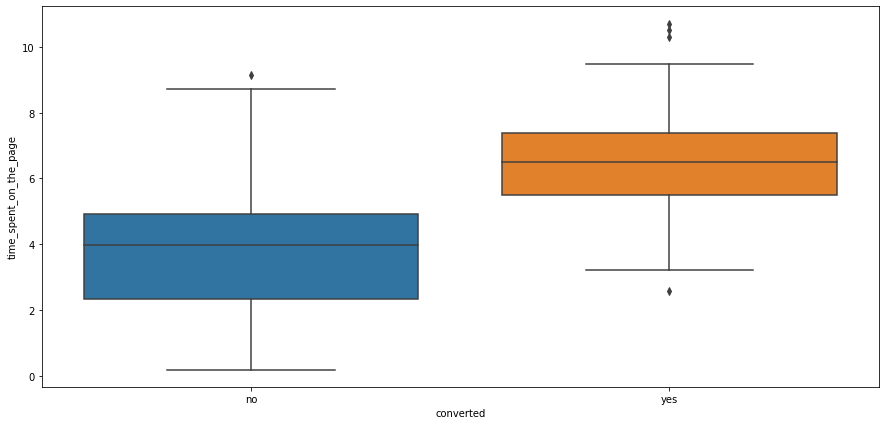

In [ ]:
# Relationship between time spent on the page and converted status
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "converted", y = "time_spent_on_the_page")
plt.show()

* **The time spent on on converted page is higher than none None-converted page**

##### Time Spent on the Page vs Language Preferred

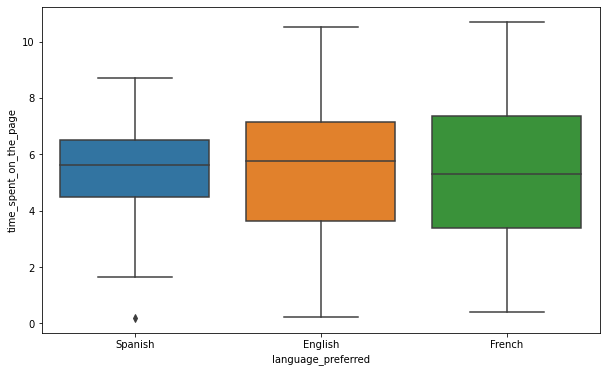

In [ ]:
# Relationship between time spent on the page and language preferred
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = "language_preferred", y = "time_spent_on_the_page")
plt.show()

* **The mean and median time spent users based on preferred language are almost equal but the Spanish preferred language have some outliers**

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Performing Visual Analysis

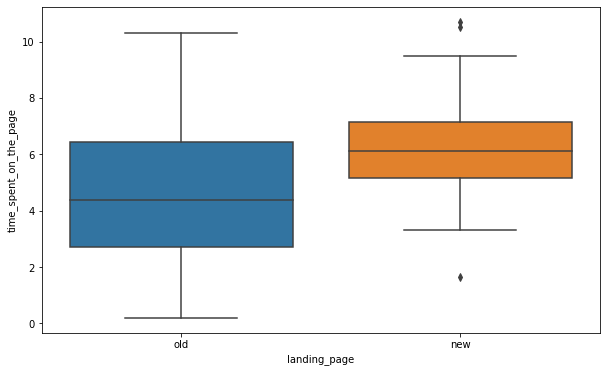

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(10,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

* **Users spend more time on the new landing page than the old landing page with some outliers in the new landing page**

### Defining the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean time spent by users on the new landing page is equal to the mean time spent on old landing page. <br>
$H_a:$ The mean time spentby user on the new landing page is greater than the mean time spent on old landing page.

Let $\mu_1$ and $\mu_2$ be the mean time spent on the the new landing page and the mean time spent on the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Selecting Appropriate test

This is a case of one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Hence, a two-sample paired t-test is the most appropriate test for this case.** **Based on this information, select the appropriate test**.

**Two-sample Paired t-test**

In a two-sample paired t-test, we compare the means from two dependent (related) populations to check if they differ significantly. We are provided that the sample is randomly selected.

### Deciding the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Collecting and preparing data

In [ ]:
# creating subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# creating subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


* Obervation: **Based on the sample standard deviations of the two groups, the population standard deviations can be assumed not to be equal**.

### Calculating the p-value

In [ ]:
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value  = ttest_rel(time_spent_new, time_spent_old, alternative = 'greater')  
print('The p-value is', p_value)

The p-value is 0.00029910900937037973


### Comparing the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


### Drawing inference

Since the p-value is less than the level of significance (5%), we reject the null hypothesis. Hence there is enough statistical evidence to say that the mean time spent by user on the new landing page is greater than the mean time spent by user on the old landing page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Performing Visual Analysis

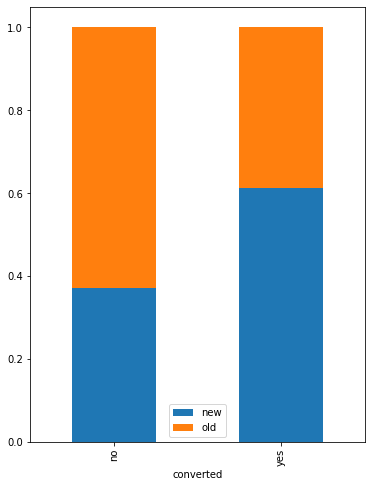

In [ ]:
# visually comparing the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['converted'], df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

* **More people are converted on the old page compared to the new page**

### Defining the null and alternate hypotheses

$H_0:$ Conversion rate on the New page is equal to conversion rate on the Old page

$H_a:$ Conversion rate on the New page greater than conversion rate Old page

### Selecting Appropriate test

Since we are comparing the sample proportion to the population proportion, we use **Proportion Z-test**

### Deciding the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Collecting and preparing data

In [ ]:
# calculating the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculating the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Calculating the p-value

In [ ]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest
# finding the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Comparing the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Drawing inference

Since the p-value is less than the level of significance (5%), we reject the null hypothesis. Hence there is enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page

## 3. Is the conversion and preferred language are independent or related?

### Performing Visual Analysis

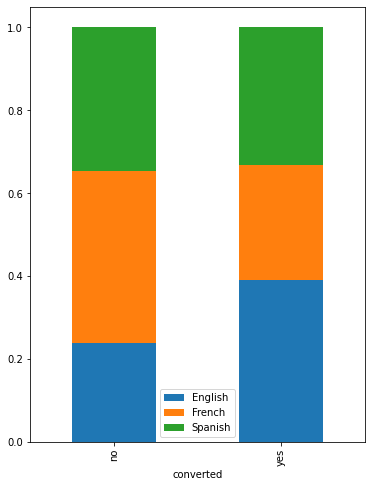

In [ ]:
# visually ploting the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'], df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

* **The Spanish preferred language has the highest rate of conversion compared to the other two languages.**

### Defining the null and alternate hypotheses

$H_0:$ Conversion status is independent of preferred language

$H_a:$ Conversion status is not independent of preferred language

### Selecting Appropriate test

Since we want to confirm if the categorical variables from a population are independent, we use **Chi-Square test of independence**

### Deciding the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Collecting and preparing data

In [ ]:
# creating a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Calculating the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Comparing the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Drawing inference

At a 5% significance level, we fail to reject the null hypothesis because p-value is greater than the level of significance. Hence, we do not have enough statistical evidence to say that conversion status is independent of the preferred language

## 4. Is the time spent on the new page same for the different language users?

### Performing Visual Analysis

In [ ]:
# creating a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

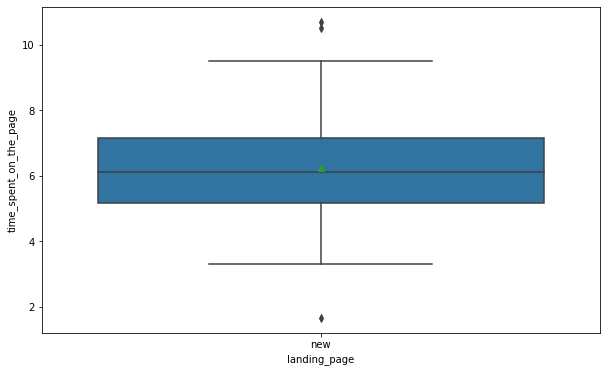

In [ ]:
# visually plotting the time spent on the new page for different language users
plt.figure(figsize=(10,6))
sns.boxplot(x = 'landing_page', y = "time_spent_on_the_page", showmeans = True, data = df_new)
plt.show()


* **The median, minimum and maximum time spent on the new landing page is 3 mins, 6 mins, and 9 mins respectively with some outliers** 

### Defining the null and alternate hypotheses



> $H_0$ : The mean value  with respect to each preferred language category is equal. <br>
> $H_a$ : At least one of the mean value with respect to the three preffered language category is different.

### Selecting Appropriate test

This is a problem, concerning three population means. Based on this information, **One-way ANOVA test** would be used to compare the three population means provided normality and equality of variance assumptions are verified.

**One-way ANOVA Test**

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The mean value with respect to each preferred language follow a normal distribution

against the alternative hypothesis

>$H_a:$ The mean value with respect to the three preferred language do not not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

a,b = 1,2
a=1
b=2

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df[df['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            df[df['language_preferred']=='English']['time_spent_on_the_page'],
                            df[df['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Deciding the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Collecting and preparing data

In [ ]:
# creating separate variables to store the weightlosses with respect to the three preferred languages
weightloss_diet_A = df[df['language_preferred']=='Spanish']['time_spent_on_the_page']
weightloss_diet_B = df[df['language_preferred']=='English']['time_spent_on_the_page']
weightloss_diet_C = df[df['language_preferred']=='French']['time_spent_on_the_page']

### Calculating the p-value

In [ ]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Comparing the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Drawing inference

Since the p-value is greater than the level of significance (5%), we fail to reject the null hypothesis. Hence, we don't have enough statistical evidence to say that the the mean value with respect to each category of the preferred language is equal.

## Conclusion and Business Recommendations

* Users spend more time on the new landing page than the old landing page which is an indication that recommended content on the new landing page is likely to keep customers engage long enough to enable them them subscribe
* Conversion status is independent of the language preferred which is an indication that irrespective of the preferred language, recommended contents on the new landing page are engaging
* Conversion rate of the new landing page is higher than the conversion rate of the old landing page which is an indication that the new landing page is likely to attract new subscribers than the old landing page
* The recommendation is that the E-News company maintais the new landing page to attract more subscribers as users spend more time on an engaging page, it would leads to customer conversion.